In [1]:
import sys
sys.path.append('..')

# OS and system
import os
import gc
import argparse
from argparse import Namespace
import pickle

# utils
from functools import partial
from copy import deepcopy
from tqdm import tqdm
import time

# mathematics
import matplotlib.pyplot as plt
import numpy as np
import random

# data handling
import pandas as pd

# Torch
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.autograd import Variable

# Torchvision
import torchvision

# logging
# import wandb

# my_lib
from model.net import *
from model.train import train, test
from misc.utils import save_checkpoint, load_transform, load_dataset


In [123]:
random_train_logs = {}
random_test_logs = {}

perturb_eps = [0.0, 0.0001, 0.0005, 0.001, 0.005, 0.01]
for eps in perturb_eps:

    # Load the data
    train_temp = []
    test_temp = []
    for seed in range(1, 3):
        train_data = pd.read_csv(f'../results/cifair/PGD_random_2/eps_{eps}/seed_{seed}/train_log.csv')
        test_data = pd.read_csv(f'../results/cifair/PGD_random_2/eps_{eps}/seed_{seed}/test_log.csv')

        train_temp.append(train_data)
        test_temp.append(test_data)

    random_train_logs[eps] = train_temp
    random_test_logs[eps] = test_temp



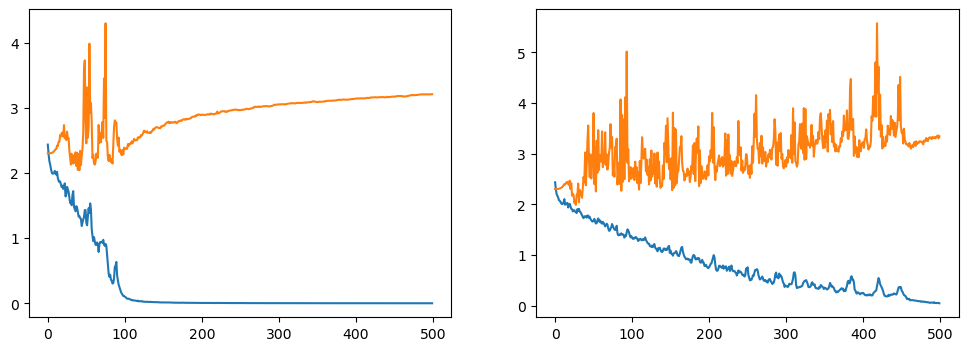

In [125]:
idx = 1
eps = 0.01

fig, axs = plt.subplots(1, 2, figsize=(12, 4))

axs[0].plot(random_train_logs[0.0][idx]['loss'])
axs[0].plot(random_test_logs[0.0][idx]['loss'])

axs[1].plot(random_train_logs[eps][idx]['loss'])
axs[1].plot(random_test_logs[eps][idx]['loss'])


eps: 0.0 max test acc:  36.85
eps: 0.005 max test acc:  35.629997


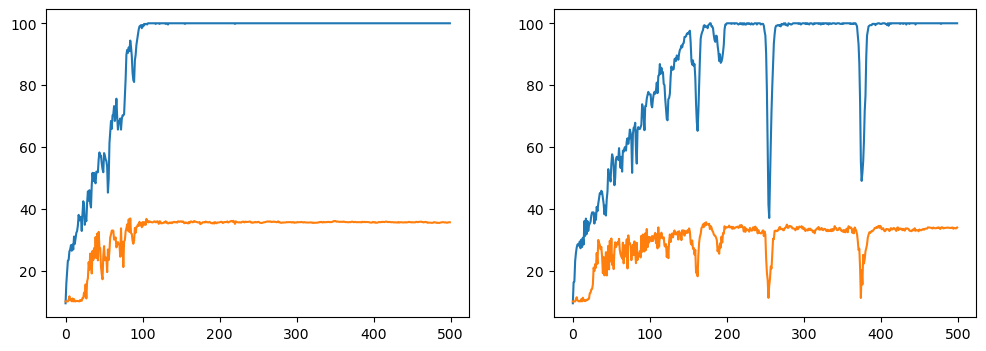

In [127]:
seed = 1
eps = 0.005

fig, axs = plt.subplots(1, 2, figsize=(12, 4))

axs[0].plot(random_train_logs[0.0][idx]['acc'])
axs[0].plot(random_test_logs[0.0][idx]['acc'])

axs[1].plot(random_train_logs[eps][idx]['acc'])
axs[1].plot(random_test_logs[eps][idx]['acc'])

print('eps: 0.0 max test acc: ', max(random_test_logs[0.0][idx]['acc']))
print(f'eps: {eps} max test acc: ', max(random_test_logs[eps][idx]['acc']))

In [100]:
max_test_accs = []
for eps in perturb_eps:
    max_test_acc = 0.0
    temp = []
    for idx in range(2):
        temp.append(max(max_test_acc, max(random_test_logs[eps][idx]['acc'])))
    max_test_accs.append(np.mean(temp))

Text(0, 0.5, 'max test acc')

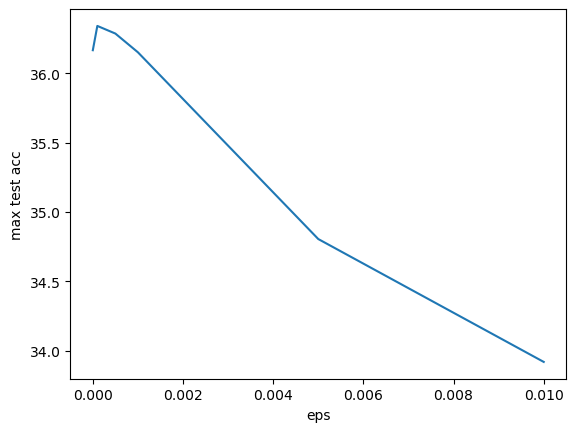

In [103]:
plt.plot(perturb_eps, max_test_accs)
plt.xlabel('eps')
plt.ylabel('max test acc')

# plt.xscale('log')

In [132]:
anti_train_logs = {}
anti_test_logs = {}

perturb_eps = [0.001]
perturb_taus = [0.05, 0.1, 0.5, 1, 5]
for eps in perturb_eps:
    anti_train_logs[eps] = {}
    anti_test_logs[eps] = {}

    perturb_eps_str = str(eps).split('.')[1]
    for tau in perturb_taus:
        # Load the data
        train_temp = []
        test_temp = []
        for seed in range(1, 3):
            train_data = pd.read_csv(f'../results/cifair/PGD_anti_2/eps_{perturb_eps_str}/tau_{tau}/seed_{seed}/train_log.csv')
            test_data = pd.read_csv(f'../results/cifair/PGD_anti_2/eps_{perturb_eps_str}/tau_{tau}/seed_{seed}/test_log.csv')

            train_temp.append(train_data)
            test_temp.append(test_data)

        anti_train_logs[eps][tau] = train_temp
        anti_test_logs[eps][tau] = test_temp



(0.0, 4.0)

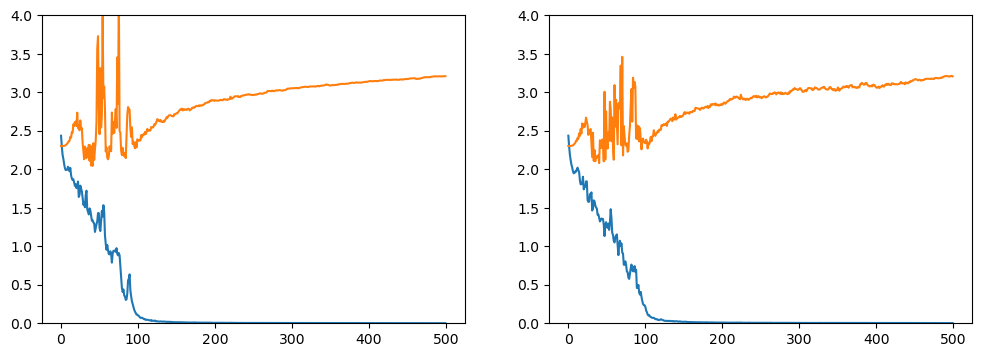

In [133]:
idx = 1
eps = 0.001
tau = 0.1

fig, axs = plt.subplots(1, 2, figsize=(12, 4))

axs[0].plot(random_train_logs[0.0][idx]['loss'])
axs[0].plot(random_test_logs[0.0][idx]['loss'])

axs[1].plot(anti_train_logs[eps][tau][idx]['loss'])
axs[1].plot(anti_test_logs[eps][tau][idx]['loss'])

axs[0].set_ylim(0, 4)
axs[1].set_ylim(0, 4)


eps: 0.0 max test acc:  35.48
eps: 0.001 max test acc:  35.11


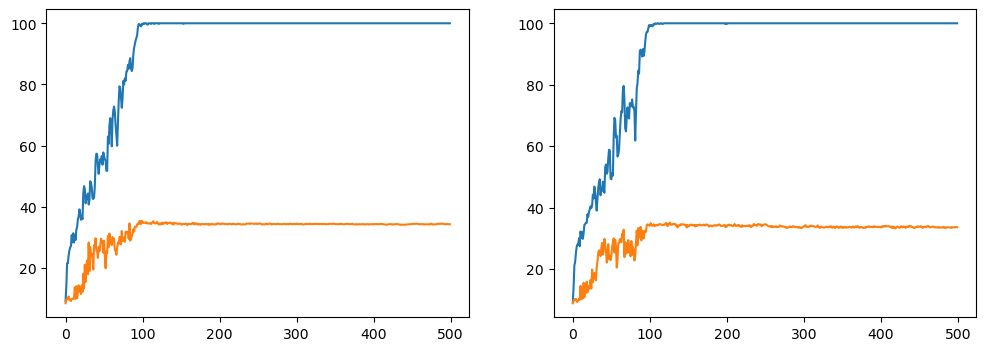

In [134]:
idx = 0
eps = 0.001
tau = 0.05

fig, axs = plt.subplots(1, 2, figsize=(12, 4))

axs[0].plot(random_train_logs[0.0][idx]['acc'])
axs[0].plot(random_test_logs[0.0][idx]['acc'])

axs[1].plot(anti_train_logs[eps][tau][idx]['acc'])
axs[1].plot(anti_test_logs[eps][tau][idx]['acc'])

print('eps: 0.0 max test acc: ', max(random_test_logs[0.0][idx]['acc']))
print(f'eps: {eps} max test acc: ', max(anti_test_logs[eps][tau][idx]['acc']))

In [121]:
anti_max_test_accs = []
for tau in perturb_taus:
    max_test_acc = 0.0
    temp = []
    for idx in range(2):
        temp.append(max(max_test_acc, max(anti_test_logs[eps][tau][idx]['acc'])))
    anti_max_test_accs.append(np.mean(temp))

Text(0, 0.5, 'max test acc')

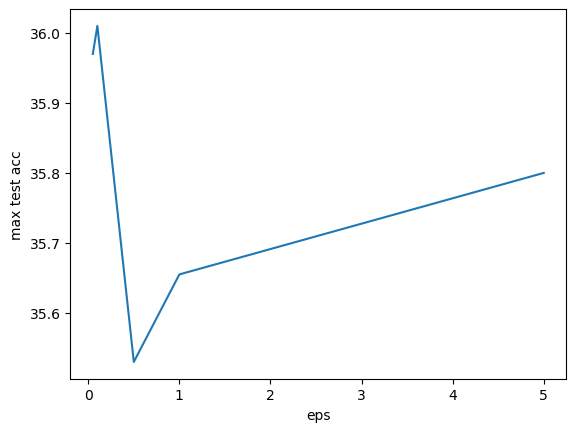

In [122]:
plt.plot(perturb_taus, anti_max_test_accs)
plt.xlabel('eps')
plt.ylabel('max test acc')

# plt.xscale('log')